<a href="https://colab.research.google.com/github/ksshu/denoising/blob/master/Autoencoder_keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount("/content/drive/")
#from google.colab import drive
#drive.mount("/content/drive")

Mounted at /content/drive/


In [2]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import image
import cv2
import os
from tensorflow.keras.layers import Conv2D, MaxPooling2D, UpSampling2D
from tensorflow.keras.models import Sequential

import numpy as np
import matplotlib.pyplot as plt

import os
import cv2
from tensorflow.keras.utils import img_to_array
#from keras.preprocessing.image import img_to_array


In [ ]:
## Dfining paths
PATH_TO_CLEAN_IMAGES = "/content/drive/MyDrive/GAAN/gaan"
PATH_TO_NOISY_IMAGES = "/content/drive/MyDrive/GAAN/gaan"

In [ ]:
SIZE=256

In [ ]:

from tqdm import tqdm
noisy_data=[]
path1 ="/content/drive/MyDrive/GAAN/gaan"
files=os.listdir(path1)
for i in tqdm(files):
  img=cv2.imread(path1+'/'+i,1)   #Change 0 to 1 for color images
  img=cv2.resize(img,(SIZE, SIZE))
  noisy_data.append(img_to_array(img))

    

100%|██████████| 42/42 [00:24<00:00,  1.68it/s]


In [ ]:
    

clean_data=[]
path2 = "/content/drive/MyDrive/GAAN/gaan"
files=os.listdir(path2)
for i in tqdm(files):
  img=cv2.imread(path2+'/'+i,1)  #Change 0 to 1 for color images
  img=cv2.resize(img,(SIZE, SIZE))
  clean_data.append(img_to_array(img))


100%|██████████| 42/42 [00:00<00:00, 469.36it/s]


In [ ]:

noisy_train = np.reshape(noisy_data, (len(noisy_data), SIZE, SIZE, 3))
noisy_train = noisy_train.astype('float32') / 255.

clean_train = np.reshape(clean_data, (len(clean_data), SIZE, SIZE, 3))
clean_train = clean_train.astype('float32') / 255.

print(noisy_train)

[[[[0.39215687 0.25490198 0.12156863]
   [0.39215687 0.25490198 0.12156863]
   [0.3882353  0.2509804  0.11764706]
   ...
   [0.23921569 0.13333334 0.08627451]
   [0.23921569 0.13725491 0.09019608]
   [0.23921569 0.13725491 0.09019608]]

  [[0.39215687 0.25490198 0.12156863]
   [0.39215687 0.25490198 0.12156863]
   [0.3882353  0.25490198 0.11764706]
   ...
   [0.23921569 0.13333334 0.09019608]
   [0.23921569 0.13725491 0.09019608]
   [0.23921569 0.13725491 0.09019608]]

  [[0.39607844 0.25882354 0.1254902 ]
   [0.39607844 0.25882354 0.1254902 ]
   [0.39215687 0.25490198 0.12156863]
   ...
   [0.23529412 0.13333334 0.08627451]
   [0.23921569 0.13725491 0.09019608]
   [0.23921569 0.13725491 0.09019608]]

  ...

  [[0.26666668 0.3019608  0.17254902]
   [0.26666668 0.3019608  0.17254902]
   [0.27058825 0.30588236 0.1764706 ]
   ...
   [0.30980393 0.30588236 0.18039216]
   [0.3137255  0.30980393 0.18431373]
   [0.3137255  0.30980393 0.18431373]]

  [[0.27450982 0.30980393 0.18039216]
   [0.2

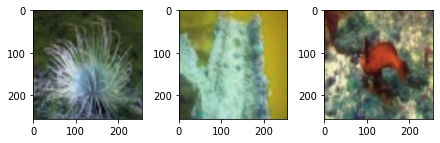

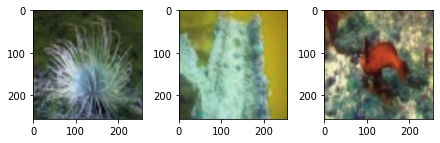

In [ ]:

#Displaying images with noise
plt.figure(figsize=(10, 2))
for i in range(1,4):
    ax = plt.subplot(1, 4, i)
    plt.imshow(noisy_train[i].reshape(SIZE, SIZE,3), cmap="binary")
plt.show()

#Displaying clean images
plt.figure(figsize=(10, 2))
for i in range(1,4):
    ax = plt.subplot(1, 4, i)
    plt.imshow(clean_train[i].reshape(SIZE, SIZE,3), cmap="binary")
plt.show()


In [ ]:


model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(SIZE, SIZE, 3)))
model.add(MaxPooling2D((2, 2), padding='same'))
model.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2), padding='same'))
model.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
 

model.add(MaxPooling2D((2, 2), padding='same'))
     
model.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(3, (3, 3), activation='relu', padding='same'))

model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 256, 256, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 128, 128, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 8)       2312      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 64, 64, 8)        0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 64, 64, 8)         584       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 32, 32, 8)        0

In [ ]:
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])


In [ ]:

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(noisy_train, clean_train, 
                                                    test_size = 0.20, random_state = 0)


In [ ]:
model.fit(x_train, y_train, epochs=10, batch_size=8, shuffle=True, verbose = 1,
          validation_split = 0.1)

Epoch 1/10
4/4 [==============================] - 10s 235ms/step - loss: 0.2099 - accuracy: 0.2898 - val_loss: 0.1327 - val_accuracy: 0.4078
Epoch 2/10
4/4 [==============================] - 0s 33ms/step - loss: 0.1446 - accuracy: 0.2876 - val_loss: 0.0774 - val_accuracy: 0.4064
Epoch 3/10
4/4 [==============================] - 0s 35ms/step - loss: 0.1071 - accuracy: 0.2873 - val_loss: 0.0641 - val_accuracy: 0.4068
Epoch 4/10
4/4 [==============================] - 0s 33ms/step - loss: 0.0648 - accuracy: 0.3189 - val_loss: 0.0284 - val_accuracy: 0.1422
Epoch 5/10
4/4 [==============================] - 0s 35ms/step - loss: 0.0319 - accuracy: 0.2436 - val_loss: 0.0177 - val_accuracy: 0.4706
Epoch 6/10
4/4 [==============================] - 0s 33ms/step - loss: 0.0261 - accuracy: 0.4567 - val_loss: 0.0177 - val_accuracy: 0.4764
Epoch 7/10
4/4 [==============================] - 0s 33ms/step - loss: 0.0239 - accuracy: 0.4584 - val_loss: 0.0148 - val_accuracy: 0.4771
Epoch 8/10
4/4 [=========

In [ ]:
model.save('denoising_autoencoder.model')

img = model.predict(x_test)


1/1 [==============================] - 0s 348ms/step


In [ ]:
img.shape

(9, 256, 256, 3)

TypeError: ignored

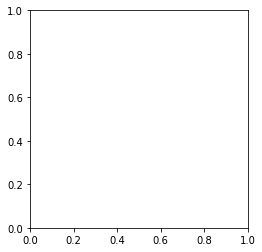

In [ ]:
import matplotlib.pyplot as plt

plt.imshow(img)

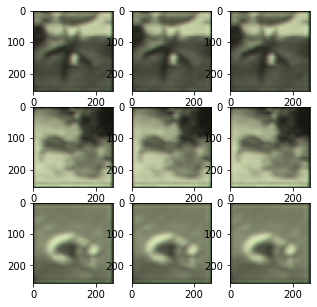

In [ ]:
fig, axes = plt.subplots(3, 3, figsize=(5,5))

axes[0][0].imshow(img[1])
axes[0][1].imshow(img[1])
axes[0][2].imshow(img[1])


axes[1][0].imshow(img[3])
axes[1][1].imshow(img[3])
axes[1][2].imshow(img[3])


axes[2][0].imshow(img[7])
axes[2][1].imshow(img[7])
axes[2][2].imshow(img[7])